In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.mpl.geoaxes as geoaxes
from matplotlib_scalebar.scalebar import ScaleBar
from sklearn.metrics.pairwise import haversine_distances
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from sklearn.preprocessing import StandardScaler

gd_src = '../geodata/{}/{}-c005-s010-vw-pr.geojson'
onemil_src = './node_modules/preprocessing/data/1Mdataset.csv'
nc_src = '../well_data/src_data.csv'

In [2]:
def stratify(df):
    df.loc[df['Depth'].between(0, 15.3, 'both'), 'Strata'] = 1
    df.loc[df['Depth'].between(15.3, 45, 'right'), 'Strata'] = 2
    df.loc[df['Depth'].between(45, 65, 'right'), 'Strata'] = 3
    df.loc[df['Depth'].between(65, 90, 'right'), 'Strata'] = 4
    df.loc[df['Depth'].between(90, 150, 'right'), 'Strata'] = 5
    df.loc[df['Depth'].gt(150), 'Strata'] = 6

In [3]:
df = pd.read_csv(nc_src)

In [4]:
level = 'dis'
gd = gpd.read_file(gd_src.format(level, level))
gd_df = gpd.GeoDataFrame(
    pd.merge(df, gd, how='left', right_on=level, left_on='Division')
)
gd_df['lon'] = gd_df.centroid.x
gd_df['lat'] = gd_df.centroid.y

gd_df.info()

/tmp/ipykernel_232741/1439901457.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gd_df['lon'] = gd_df.centroid.x
/tmp/ipykernel_232741/1439901457.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gd_df['lat'] = gd_df.centroid.y


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 868678 entries, 0 to 868677
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   Division  868678 non-null  object  
 1   District  868678 non-null  object  
 2   Upazila   868678 non-null  object  
 3   Union     868678 non-null  object  
 4   Mouza     868678 non-null  object  
 5   Depth     868678 non-null  float64 
 6   Arsenic   868678 non-null  float64 
 7   area      868678 non-null  float64 
 8   dis       868678 non-null  object  
 9   div       868678 non-null  object  
 10  geometry  868678 non-null  geometry
 11  lon       868678 non-null  float64 
 12  lat       868678 non-null  float64 
dtypes: float64(5), geometry(1), object(7)
memory usage: 92.8+ MB


In [5]:
df = pd.DataFrame(gd_df)
stratify(df)
df.drop([
    'geometry',
    'Division',
    'Upazila',
    'Union',
    'Mouza',
    'area',
    'div',
    'dis',
    'Depth'
], inplace=True, axis=1)

df_stratas = [
    df.loc[df['Strata'] == 1],
    df.loc[df['Strata'] == 2],
    df.loc[df['Strata'] == 3],
    df.loc[df['Strata'] == 4],
    df.loc[df['Strata'] == 5],
    df.loc[df['Strata'] == 6],
]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868678 entries, 0 to 868677
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   District  868678 non-null  object 
 1   Arsenic   868678 non-null  float64
 2   lon       868678 non-null  float64
 3   lat       868678 non-null  float64
 4   Strata    868678 non-null  float64
dtypes: float64(4), object(1)
memory usage: 39.8+ MB


In [6]:
df_stratas[0].info()
print(df_stratas[0].head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211818 entries, 2 to 868666
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   District  211818 non-null  object 
 1   Arsenic   211818 non-null  float64
 2   lon       211818 non-null  float64
 3   lat       211818 non-null  float64
 4   Strata    211818 non-null  float64
dtypes: float64(4), object(1)
memory usage: 9.7+ MB
     District  Arsenic        lon        lat  Strata
2    Noakhali     60.0  91.834370  22.443269     1.0
5   Sirajganj     25.0  88.651427  24.465743     1.0
7   Gaibandha     10.0  89.236816  25.649758     1.0
12     Sylhet      0.0  91.987316  24.919210     1.0
15  Sunamganj      0.0  91.987316  24.919210     1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 211818 entries, 2 to 868666
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   District  211818 non-null  object 
 1   Arsenic   211818 non-null  float64
 2   lon       211818 non-null  float64
 3   lat       211818 non-null  float64
 4   Strata    211818 non-null  float64
dtypes: float64(4), object(1)
memory usage: 9.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, Bagerhat to Thakurgaon
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Arsenic  54 non-null     float64
 1   lon      54 non-null     float64
 2   lat      54 non-null     float64
 3   Strata   54 non-null     float64
dtypes: float64(4)
memory usage: 2.1+ KB
    Arsenic       lon       lat  Strata
0  0.159645  0.142857  0.142857     0.0
1  0.031042  0.285714  0.285714     0.0
2  0.547598  0.285714  0.285714     0.0
3  0.247568  0.28

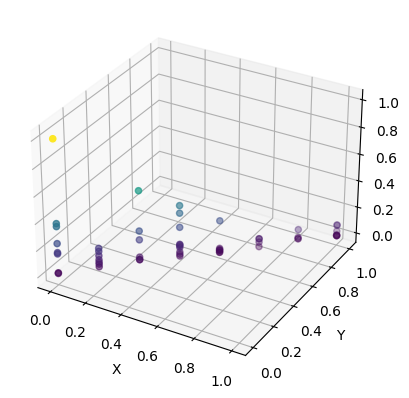

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462100 entries, 1 to 868677
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   District  462100 non-null  object 
 1   Arsenic   462100 non-null  float64
 2   lon       462100 non-null  float64
 3   lat       462100 non-null  float64
 4   Strata    462100 non-null  float64
dtypes: float64(4), object(1)
memory usage: 21.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Bagerhat to Thakurgaon
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Arsenic  60 non-null     float64
 1   lon      60 non-null     float64
 2   lat      60 non-null     float64
 3   Strata   60 non-null     float64
dtypes: float64(4)
memory usage: 2.3+ KB
    Arsenic       lon       lat  Strata
0  0.512652  0.142857  0.142857     0.0
1  0.001345  0.285714  0.285714     0.0
2  0.669741  0.285714  0.285714     0.0
3  0.133513  0.2

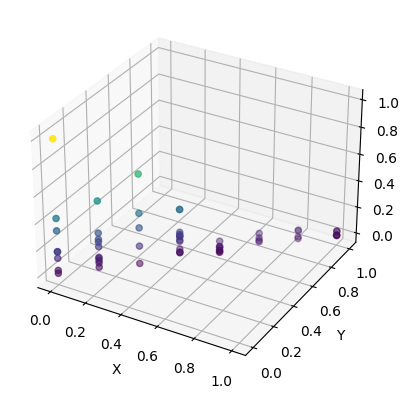

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116694 entries, 0 to 868668
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   District  116694 non-null  object 
 1   Arsenic   116694 non-null  float64
 2   lon       116694 non-null  float64
 3   lat       116694 non-null  float64
 4   Strata    116694 non-null  float64
dtypes: float64(4), object(1)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Bagerhat to Tangail
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Arsenic  53 non-null     float64
 1   lon      53 non-null     float64
 2   lat      53 non-null     float64
 3   Strata   53 non-null     float64
dtypes: float64(4)
memory usage: 2.1+ KB
    Arsenic       lon       lat  Strata
0  0.000000  0.142857  0.142857     0.0
1  0.091729  0.285714  0.285714     0.0
2  0.226797  0.285714  0.285714     0.0
3  0.040489  0.57142

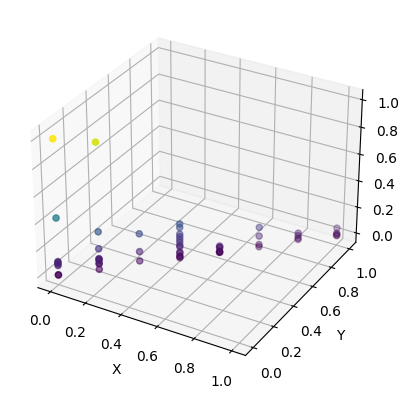

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18941 entries, 46 to 868665
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  18941 non-null  object 
 1   Arsenic   18941 non-null  float64
 2   lon       18941 non-null  float64
 3   lat       18941 non-null  float64
 4   Strata    18941 non-null  float64
dtypes: float64(4), object(1)
memory usage: 887.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, Barisal to Thakurgaon
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Arsenic  41 non-null     float64
 1   lon      41 non-null     float64
 2   lat      41 non-null     float64
 3   Strata   41 non-null     float64
dtypes: float64(4)
memory usage: 1.6+ KB
    Arsenic       lon       lat  Strata
0  0.857809  0.285714  0.285714     0.0
1  0.807677  0.285714  0.285714     0.0
2  0.046790  0.571429  0.571429     0.0
3  0.263502  0.000000  

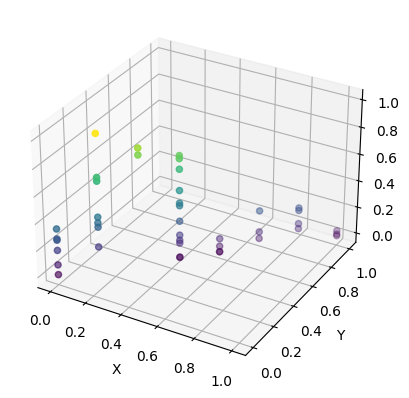

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17102 entries, 16 to 868674
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  17102 non-null  object 
 1   Arsenic   17102 non-null  float64
 2   lon       17102 non-null  float64
 3   lat       17102 non-null  float64
 4   Strata    17102 non-null  float64
dtypes: float64(4), object(1)
memory usage: 801.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Barisal to Tangail
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Arsenic  39 non-null     float64
 1   lon      39 non-null     float64
 2   lat      39 non-null     float64
 3   Strata   39 non-null     float64
dtypes: float64(4)
memory usage: 1.5+ KB
    Arsenic       lon       lat  Strata
0  0.010870  0.285714  0.285714     0.0
1  0.365364  0.285714  0.285714     0.0
2  0.080254  0.571429  0.571429     0.0
3  0.166368  0.000000  0.0

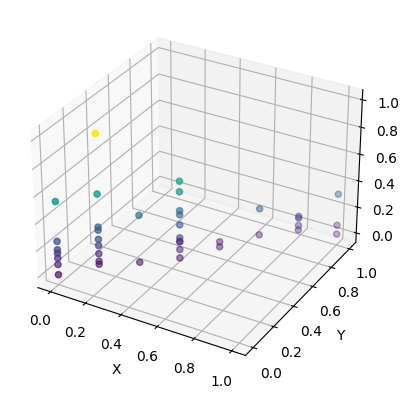

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42023 entries, 9 to 868635
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  42023 non-null  object 
 1   Arsenic   42023 non-null  float64
 2   lon       42023 non-null  float64
 3   lat       42023 non-null  float64
 4   Strata    42023 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Bagerhat to Tangail
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Arsenic  46 non-null     float64
 1   lon      46 non-null     float64
 2   lat      46 non-null     float64
 3   Strata   46 non-null     float64
dtypes: float64(4)
memory usage: 1.8+ KB
    Arsenic       lon       lat  Strata
0  0.023841  0.142857  0.142857     0.0
1  0.001958  0.285714  0.285714     0.0
2  0.021472  0.285714  0.285714     0.0
3  0.038652  0.285714  0.285

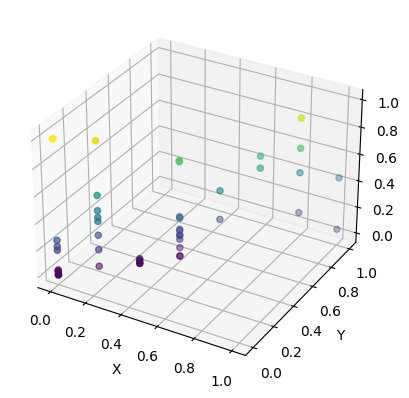

In [19]:
scaler = MinMaxScaler()
import plotly.graph_objects as go
def threed_plots():
    for dfs in df_stratas:
        df = dfs.copy()

        df.info()
        df['lat'] = pd.Categorical(df['lat']).codes
        df['lon'] = pd.Categorical(df['lat']).codes
        df = df.groupby(['District']).mean()
        df.info()

        scaled_data = scaler.fit_transform(df)
        df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
        print(df_scaled.head())

        # create 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df_scaled['lat'], df_scaled['lon'], df_scaled['Arsenic'], c=df_scaled['Arsenic'], cmap='viridis')

        # set axis labels
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        # show plot
        plt.show()

    
threed_plots()

[[ 0.70886129  0.57562789  0.42921793 ...  0.27541086  0.42921793
   0.57562789]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 ...
 [ 0.27541086  0.09046523 -0.09334004 ... -0.26940744 -0.09334004
   0.09046523]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]]


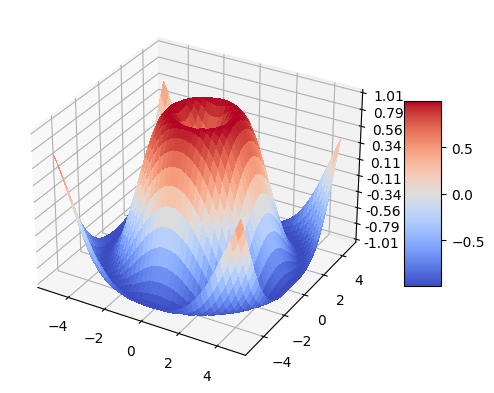

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(Z)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()